
# Milestone 1

In [ ]:
#@title 0.1: Install and Import Libraries
# Install the required libraries quietly.
!pip install transformers sentencepiece --quiet
print("✅ Libraries installed.")

# Import the necessary classes from the transformers library.
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
# 'textwrap' is a great tool for formatting our output nicely.
import textwrap
print("✅ Libraries imported successfully.")

✅ Libraries installed.
✅ Libraries imported successfully.


In [ ]:
!pip install transformers sentencepiece sentence-transformers scikit-learn matplotlib pandas --quiet
print("✅ Libraries installed.")

✅ Libraries installed.


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import textwrap
import re
import requests
import ssl
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Handle SSL for file downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("✅ Libraries imported.")

✅ Libraries imported.


## Load Summarization models

In [ ]:
t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-base')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
pegasus_sum_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
pegasus_sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
print("✅ Summarization models loaded: T5, BART, PEGASUS.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

✅ Summarization models loaded: T5, BART, PEGASUS.



##Load Paraphrasing Models

In [ ]:
pegasus_para_tokenizer = PegasusTokenizer.from_pretrained('tuner007/pegasus_paraphrase')
pegasus_para_model = PegasusForConditionalGeneration.from_pretrained('tuner007/pegasus_paraphrase')
paraphrase_t5_tokenizer = T5Tokenizer.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_t5_model = T5ForConditionalGeneration.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_bart_tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
paraphrase_bart_model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')
print("✅ Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.")

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/332 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

✅ Paraphrasing models loaded: PEGASUS, T5-Paraphrase, BART-Paraphrase.


## Load Similarity Model

In [ ]:
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✅ Similarity model loaded.")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Similarity model loaded.


## Load Two Input Text Files

In [ ]:
def load_text_file(*args):
  """
  A simple function to concatenate multiple strings.
  In a real scenario, this would load text from files.
  """
  return "\n\n".join(args)

In [ ]:
input1 = '''
Recent advances in artificial intelligence (AI) are transforming healthcare
delivery, diagnosis, and research. Machine learning models now assist
physicians by analyzing medical images such as X-rays and MRIs, detecting
anomalies often at or above human-level accuracy. Natural language processing
helps extract useful information from electronic health records (EHRs),
making long patient histories searchable and enabling clinical decision
support.
AI-driven drug discovery pipelines speed up candidate screening by predicting
molecular properties and potential toxicity, lowering time-to-discovery and
cost. Personalized medicine benefits from predictive models that combine
genomic, lifestyle, and clinical data to recommend tailored therapies.
Telemedicine adoption — accelerated by the COVID-19 pandemic — relies on AI
for remote monitoring and triage.
However, challenges remain. Data privacy and patient consent are critical
when using sensitive health records. Models trained on limited or biased
datasets may perform poorly for underrepresented populations, exacerbating
health disparities. Explainability is another concern: clinicians need
interpretable model outputs to trust recommendations. Regulatory frameworks
and robust validation are required before clinical deployment.
As research continues, interdisciplinary collaboration among clinicians, data
scientists, regulators, and ethicists will be essential to ensure AI tools
are safe, effective, and equitable. Investment in infrastructure, proper data
governance, and transparent evaluation will help integrate AI responsibly
within healthcare systems.
'''
input2 = '''
Countries worldwide are ramping up investments in renewable energy as a
response to climate change and the need for energy security. Solar
photovoltaic and onshore wind are among the fastest-growing electricity
4
generation sources due to rapidly falling costs and favorable policy
incentives. Many governments set ambitious targets to reach net-zero
emissions by mid-century, driving accelerated deployment of renewables.
Energy storage technologies, primarily lithium-ion batteries, are critical
for handling the variable nature of solar and wind power. Improved grid
infrastructure, including smart grids and demand response, helps integrate
intermittency while maintaining reliability. Large-scale adoption of
renewables also increases jobs in manufacturing, construction, and
maintenance, providing economic co-benefits.
Despite progress, challenges persist: grid modernization requires substantial
capital, and mineral supply chains for batteries must be developed
sustainably. Some regions face land-use constraints and community opposition
to certain renewable projects. Policy stability and long-term planning are
necessary to attract private investment.
Continued innovation — whether in next-generation batteries, green hydrogen,
or more efficient solar cells — will further lower costs and expand usecases. Combining renewables with energy efficiency measures and
electrification of sectors like transport and heating is essential for deep
decarbonization.
'''
ref1 = '''AI is transforming healthcare through medical-image analysis, EHR
mining, drug discovery acceleration, and personalized medicine. Challenges
include data privacy, model bias, explainability, and the need for regulatory
validation and interdisciplinary collaboration.'''
ref2 = '''Renewable energy deployment — especially solar and wind — is growing
due to falling costs and policy targets, supported by energy storage and grid
upgrades. Obstacles include infrastructure costs, battery supply-chain
sustainability, and the need for policy stability and innovation to reach
deep decarbonization.'''

cleaned_text = load_text_file(input1, input2, ref1, ref2)
print(cleaned_text)


Recent advances in artificial intelligence (AI) are transforming healthcare 
delivery, diagnosis, and research. Machine learning models now assist 
physicians by analyzing medical images such as X-rays and MRIs, detecting 
anomalies often at or above human-level accuracy. Natural language processing 
helps extract useful information from electronic health records (EHRs), 
making long patient histories searchable and enabling clinical decision 
support.
AI-driven drug discovery pipelines speed up candidate screening by predicting 
molecular properties and potential toxicity, lowering time-to-discovery and 
cost. Personalized medicine benefits from predictive models that combine 
genomic, lifestyle, and clinical data to recommend tailored therapies. 
Telemedicine adoption — accelerated by the COVID-19 pandemic — relies on AI 
for remote monitoring and triage.
However, challenges remain. Data privacy and patient consent are critical 
when using sensitive health records. Models trained on

In [ ]:
def validate_text(text):
    """Validate text input."""
    if not isinstance(text, str) or len(text.strip()) < 50:
        raise ValueError("Invalid text: must be a string with at least 50 characters.")
    return text


In [ ]:
cleaned_text = load_text_file(input1, input2, ref1, ref2)
print("Cleaned text Preview:", {len(input1)}," characters")
print(cleaned_text[:500])

Cleaned text Preview: {1644}  characters

Recent advances in artificial intelligence (AI) are transforming healthcare 
delivery, diagnosis, and research. Machine learning models now assist 
physicians by analyzing medical images such as X-rays and MRIs, detecting 
anomalies often at or above human-level accuracy. Natural language processing 
helps extract useful information from electronic health records (EHRs), 
making long patient histories searchable and enabling clinical decision 
support.
AI-driven drug discovery pipelines speed u


# Text Summarization

## T5 Summarization

In [ ]:
def generate_t5_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with T5."""
    input_text = "summarize: " + text.strip().replace("\n", " ")
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

## BART Summarization

In [ ]:
def generate_bart_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

## PEGASUS Summarization

In [ ]:
def generate_pegasus_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with PEGASUS."""
    # Clean and truncate input to prevent tokenization issues
    text = clean_text(text[:1500])  # Stricter truncation to 1500 chars
    try:
        inputs = pegasus_sum_tokenizer.encode(
            text,
            return_tensors='pt',
            max_length=512,  # Reduced max_length for safety
            truncation=True,
            padding='max_length'  # Ensure consistent input size
        )
        # Validate token IDs
        if inputs.max().item() >= pegasus_sum_tokenizer.vocab_size:
            raise ValueError(f"Token ID {inputs.max().item()} exceeds vocab size {pegasus_sum_tokenizer.vocab_size}.")
        summary_ids = pegasus_sum_model.generate(
            inputs,
            max_length=max_len,
            min_length=min_len,
            num_beams=beams,
            no_repeat_ngram_size=3,
            length_penalty=2.0,
            early_stopping=True
        )
        return pegasus_sum_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        print(f"PEGASUS summarization failed: {e}")
        return "Summary unavailable due to processing error."

# Text Paraphrasing

## PEGASUS Paraphrasing

In [ ]:
def generate_pegasus_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with PEGASUS."""
    inputs = pegasus_para_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = pegasus_para_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return pegasus_para_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

## T5 Paraphrasing

In [ ]:
def generate_t5_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with T5-Paraphrase."""
    input_text = f"paraphrase: {text} </s>"
    inputs = paraphrase_t5_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    paraphrase_ids = paraphrase_t5_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_t5_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

## BART Paraphrasing

In [ ]:
def generate_bart_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with BART-Paraphrase."""
    inputs = paraphrase_bart_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = paraphrase_bart_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_bart_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

## Similarity Analysis

In [ ]:
def compute_similarity(text1, text2):
    """Compute cosine similarity between texts."""
    embeddings = similarity_model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

## Model Comparison

In [ ]:
def analyze_summary_length(summary):
    """Compute word count of summary."""
    return len(summary.split())  # Simple split instead of NLTK tokenization

## Similarity to Original

In [ ]:
def similarity_to_original(summary, original_text):
    """Compute similarity between summary and original."""
    return compute_similarity(summary, original_text[:2000])

## Summarization Comparison
####Compare T5, BART, and PEGASUS for summarization.

In [ ]:
def compare_summarizers_enhanced(text, min_len=40, max_len=150, beams=4):
    """Enhanced comparison of T5, BART, and PEGASUS for summarization."""
    t5_sum = generate_t5_summary(text[:2000], min_len, max_len, beams)
    bart_sum = generate_bart_summary(text[:2000], min_len, max_len, beams)
    pegasus_sum = generate_pegasus_summary(text[:2000], min_len, max_len, beams)

    metrics = {
        't5': {
            'summary': t5_sum,
            'length': analyze_summary_length(t5_sum),
            'sim_to_original': similarity_to_original(t5_sum, text)
        },
        'bart': {
            'summary': bart_sum,
            'length': analyze_summary_length(bart_sum),
            'sim_to_original': similarity_to_original(bart_sum, text)
        },
        'pegasus': {
            'summary': pegasus_sum,
            'length': analyze_summary_length(pegasus_sum),
            'sim_to_original': similarity_to_original(pegasus_sum, text)
        },
        'sim_t5_bart': compute_similarity(t5_sum, bart_sum),
        'sim_t5_pegasus': compute_similarity(t5_sum, pegasus_sum),
        'sim_bart_pegasus': compute_similarity(bart_sum, pegasus_sum)
    }

    print("----------- Enhanced Summarization Comparison -----------")
    print(f"T5 Summary (Length: {metrics['t5']['length']}, Sim to Original: {metrics['t5']['sim_to_original']:.3f}):")
    print(textwrap.fill(t5_sum, width=100))
    print(f"\nBART Summary (Length: {metrics['bart']['length']}, Sim to Original: {metrics['bart']['sim_to_original']:.3f}):")
    print(textwrap.fill(bart_sum, width=100))
    print(f"\nPEGASUS Summary (Length: {metrics['pegasus']['length']}, Sim to Original: {metrics['pegasus']['sim_to_original']:.3f}):")
    print(textwrap.fill(pegasus_sum, width=100))
    print(f"\nSimilarity T5 vs BART: {metrics['sim_t5_bart']:.3f}")
    print(f"Similarity T5 vs PEGASUS: {metrics['sim_t5_pegasus']:.3f}")
    print(f"Similarity BART vs PEGASUS: {metrics['sim_bart_pegasus']:.3f}")

    return metrics

##Paraphrasing Comparison
####Compare PEGASUS, T5-Paraphrase, and BART-Paraphrase.

In [ ]:
def compare_paraphrasers_enhanced(text, num_return=3, beams=10):
    """Enhanced comparison of PEGASUS, T5-Paraphrase, and BART-Paraphrase."""
    peg_paras = generate_pegasus_paraphrase(text, num_return, beams)
    t5_paras = generate_t5_paraphrase(text, num_return, beams)
    bart_paras = generate_bart_paraphrase(text, num_return, beams)

    metrics = {
        'pegasus': {
            'paraphrases': peg_paras,
            'avg_length': sum(len(p.split()) for p in peg_paras) / len(peg_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in peg_paras) / len(peg_paras)
        },
        't5_paraphrase': {
            'paraphrases': t5_paras,
            'avg_length': sum(len(p.split()) for p in t5_paras) / len(t5_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in t5_paras) / len(t5_paras)
        },
        'bart_paraphrase': {
            'paraphrases': bart_paras,
            'avg_length': sum(len(p.split()) for p in bart_paras) / len(bart_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in bart_paras) / len(bart_paras)
        },
        'avg_sim_peg_t5': sum(compute_similarity(peg_paras[i], t5_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_peg_bart': sum(compute_similarity(peg_paras[i], bart_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_t5_bart': sum(compute_similarity(t5_paras[i], bart_paras[i]) for i in range(num_return)) / num_return
    }

    print("----------- Enhanced Paraphrasing Comparison -----------")
    print(f"PEGASUS Paraphrases (Avg Length: {metrics['pegasus']['avg_length']:.1f}, Avg Sim to Original: {metrics['pegasus']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(peg_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nT5-Paraphrase Paraphrases (Avg Length: {metrics['t5_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['t5_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(t5_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nBART-Paraphrase Paraphrases (Avg Length: {metrics['bart_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['bart_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(bart_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nAverage Similarity PEGASUS vs T5-Paraphrase: {metrics['avg_sim_peg_t5']:.3f}")
    print(f"Average Similarity PEGASUS vs BART-Paraphrase: {metrics['avg_sim_peg_bart']:.3f}")
    print(f"Average Similarity T5-Paraphrase vs BART-Paraphrase: {metrics['avg_sim_t5_bart']:.3f}")

    return metrics

##Integrated TextMorph Pipeline

In [ ]:
class TextMorphPipeline:
    """Streamlined TextMorph pipeline for text files, no preprocessing or NLP."""

    def __init__(self):
        self.reference_texts = []

    def add_reference(self, text):
        """Add reference text for similarity."""
        self.reference_texts.append(text)

##Pipeline Summarization Step

In [ ]:
def pipeline_summarize(self, input_text, summarizer='t5'):
    """Summarization step in pipeline."""
    if summarizer == 't5':
        summary = generate_t5_summary(input_text)
    elif summarizer == 'bart':
        summary = generate_bart_summary(input_text)
    elif summarizer == 'pegasus':
        summary = generate_pegasus_summary(input_text)
    else:
        raise ValueError("Invalid summarizer. Choose 't5', 'bart', or 'pegasus'.")
    return summary, summarizer

##Pipeline Paraphrasing Step

In [ ]:
def pipeline_paraphrase(self, input_text, paraphrase_sentences=2):
    """Paraphrasing step with comparison."""
    # Simple sentence splitting without NLTK
    sentences = re.split(r'[.!?]+', input_text)[:paraphrase_sentences]
    sentences = [s.strip() for s in sentences if s.strip()]
    paraphrases = {}
    for i, sent in enumerate(sentences):
        key = f'Sentence {i+1}'
        metrics = compare_paraphrasers_enhanced(sent)
        paraphrases[key] = {'original': sent[:100] + "...", 'metrics': metrics}
    return paraphrases

 ##Pipeline Similarity Step

In [ ]:
def pipeline_similarity(self, input_text, top_k_similar=2):
    """Similarity step in pipeline."""
    if self.reference_texts:
        similarities = [(i+1, compute_similarity(input_text[:2000], ref)) for i, ref in enumerate(self.reference_texts)]
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k_similar]
    return []

#Full Pipeline Process

In [ ]:
def process(self, input_text, summarizer='t5', paraphrase_sentences=2, top_k_similar=2):
    """Run the full pipeline."""
    results = {}

    summary, used_summarizer = pipeline_summarize(self, input_text, summarizer)
    results['summary'] = summary
    results['summarizer_used'] = used_summarizer

    results['paraphrases'] = pipeline_paraphrase(self, input_text, paraphrase_sentences)

    results['similarities'] = pipeline_similarity(self, input_text, top_k_similar)

    return results

# Bind methods to class
TextMorphPipeline.pipeline_summarize = pipeline_summarize
TextMorphPipeline.pipeline_paraphrase = pipeline_paraphrase
TextMorphPipeline.pipeline_similarity = pipeline_similarity
TextMorphPipeline.process = process

# Initialize
pipeline = TextMorphPipeline()

##Process First Text (T5)
####Run pipeline with T5 on first text.

In [ ]:
cleaned_text = input1
results_t5_first = pipeline.process(cleaned_text, summarizer='t5')
print("----------- T5 on First Text (Artificial Intelligence) -----------")
print(f"Summary: {textwrap.fill(results_t5_first['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 9.0, Avg Sim to Original: 0.917):
  1. Artificial intelligence is transforming healthcare delivery, diagnosis, and research.
  2. Artificial intelligence is transforming healthcare delivery, diagnosis and research.
  3. Artificial intelligence is changing healthcare delivery, diagnosis, and research.

T5-Paraphrase Paraphrases (Avg Length: 12.3, Avg Sim to Original: 0.981):
  1. Recent advances in artificial intelligence (AI) are transforming healthcare delivery, diagnosis and research
  2. Recent advances in artificial intelligence (AI) transform healthcare delivery, diagnosis and research
  3. Recent advances in artificial intelligence (AI) transforming healthcare delivery, diagnosis and research

BART-Paraphrase Paraphrases (Avg Length: 13.0, Avg Sim to Original: 0.998):
  1. Recent advances in artificial intelligence (AI) are transforming healthcare delivery, diagnosis and research.
  2. Recen

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 18.0, Avg Sim to Original: 0.911):
  1. Machine learning models can be used to analyze medical images, detecting anomalies often at or above human-level accuracy.
  2. Doctors can use machine learning models to analyze medical images, detecting anomalies often at or above human-level accuracy.
  3. Machine learning models can help physicians by analyzing medical images, detecting anomalies often at or above human-level accuracy.

T5-Paraphrase Paraphrases (Avg Length: 24.7, Avg Sim to Original: 0.997):
  1. Machine learning models now assist physicians by analyzing medical images such as X-rays and MRIs, detecting anomalies often at or above human-level accuracy .
  2. Machine learning models now assist physicians by analyzing medical images such as X-rays and MRIs and detecting anomalies often at or above human-level accuracy .
  3. Machine learning models now assist physicians by analyzing medic

#Process Second Text (PEGASUS)
####Run pipeline with PEGASUS on second text.

In [ ]:
cleaned_text = input2
results_pegasus_second = pipeline.process(cleaned_text, summarizer='pegasus')
print("----------- PEGASUS on Second Text (Renewable Energy) -----------")
print(f"Summary: {textwrap.fill(results_pegasus_second['summary'], width=100)}")

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 19.0, Avg Sim to Original: 0.870):
  1. The need for energy security is one of the reasons why countries are increasing investments in renewable energy.
  2. The need for energy security is one of the reasons why countries are increasing their investments in renewable energy.
  3. As a response to climate change and the need for energy security, many countries are increasing investments in renewable energy.

T5-Paraphrase Paraphrases (Avg Length: 21.3, Avg Sim to Original: 0.974):
  1. Countries worldwide are ramping up investments in renewable energy as a response to climate change and the need for energy security .
  2. Countries worldwide are ramping up investments in renewable energy as a response to climate change and the need for energy security
  3. Countries worldwide are increasing investments in renewable energy as a response to climate change and the need for energy security .

BART-Par

/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 13.7, Avg Sim to Original: 0.816):
  1. The fastest-growing electricity generation sources are solar photovoltaic and wind.
  2. Solar photovoltaic and wind are among the fastest-growing electricity generation sources due to rapidly falling costs and favorable policy incentives.
  3. The fastest-growing electricity 4 generation sources are solar photovoltaic and wind.

T5-Paraphrase Paraphrases (Avg Length: 23.3, Avg Sim to Original: 0.969):
  1. Solar photovoltaic and onshore wind are among the fastest-growing generation sources of electricity 4 due to rapidly falling costs and favorable policy incentives
  2. Solar photovoltaic and offshore wind are among the fastest-growing generation sources of electricity 4 due to rapidly falling costs and favorable policy incentives .
  3. Solar photovoltaic and offshore wind are among the fastest-growing generation sources of electricity 4 due to rapidly fa

##Comparison on Both Texts
####Compare T5, BART, and PEGASUS on both texts.

In [ ]:
import textwrap
import re
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load Summarization models
t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-base')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
pegasus_sum_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
pegasus_sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')

# Load Similarity Model
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')

def generate_t5_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with T5."""
    input_text = "summarize: " + text.strip().replace("\n", " ")
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

def generate_bart_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

def generate_pegasus_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with PEGASUS."""
    # Clean and truncate input to prevent tokenization issues
    text = clean_text(text[:1500])  # Stricter truncation to 1500 chars
    try:
        inputs = pegasus_sum_tokenizer.encode(
            text,
            return_tensors='pt',
            max_length=512,  # Reduced max_length for safety
            truncation=True,
            padding='max_length'  # Ensure consistent input size
        )
        # Validate token IDs
        if inputs.max().item() >= pegasus_sum_tokenizer.vocab_size:
            raise ValueError(f"Token ID {inputs.max().item()} exceeds vocab size {pegasus_sum_tokenizer.vocab_size}.")
        summary_ids = pegasus_sum_model.generate(
            inputs,
            max_length=max_len,
            min_length=min_len,
            num_beams=beams,
            no_repeat_ngram_size=3,
            length_penalty=2.0,
            early_stopping=True
        )
        return pegasus_sum_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        print(f"PEGASUS summarization failed: {e}")
        return "Summary unavailable due to processing error."

def compute_similarity(text1, text2):
    """Compute cosine similarity between texts."""
    embeddings = similarity_model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]

def analyze_summary_length(summary):
    """Compute word count of summary."""
    return len(summary.split())  # Simple split instead of NLTK tokenization

def similarity_to_original(summary, original_text):
    """Compute similarity between summary and original."""
    return compute_similarity(summary, original_text[:2000])

input1 = '''
Recent advances in artificial intelligence (AI) are transforming healthcare
delivery, diagnosis, and research. Machine learning models now assist
physicians by analyzing medical images such as X-rays and MRIs, detecting
anomalies often at or above human-level accuracy. Natural language processing
helps extract useful information from electronic health records (EHRs),
making long patient histories searchable and enabling clinical decision
support.
AI-driven drug discovery pipelines speed up candidate screening by predicting
molecular properties and potential toxicity, lowering time-to-discovery and
cost. Personalized medicine benefits from predictive models that combine
genomic, lifestyle, and clinical data to recommend tailored therapies.
Telemedicine adoption — accelerated by the COVID-19 pandemic — relies on AI
for remote monitoring and triage.
However, challenges remain. Data privacy and patient consent are critical
when using sensitive health records. Models trained on limited or biased
datasets may perform poorly for underrepresented populations, exacerbating
health disparities. Explainability is another concern: clinicians need
interpretable model outputs to trust recommendations. Regulatory frameworks
and robust validation are required before clinical deployment.
As research continues, interdisciplinary collaboration among clinicians, data
scientists, regulators, and ethicists will be essential to ensure AI tools
are safe, effective, and equitable. Investment in infrastructure, proper data
governance, and transparent evaluation will help integrate AI responsibly
within healthcare systems.
'''
input2 = '''
Countries worldwide are ramping up investments in renewable energy as a
response to climate change and the need for energy security. Solar
photovoltaic and onshore wind are among the fastest-growing electricity
4
generation sources due to rapidly falling costs and favorable policy
incentives. Many governments set ambitious targets to reach net-zero
emissions by mid-century, driving accelerated deployment of renewables.
Energy storage technologies, primarily lithium-ion batteries, are critical
for handling the variable nature of solar and wind power. Improved grid
infrastructure, including smart grids and demand response, helps integrate
intermittency while maintaining reliability. Large-scale adoption of
renewables also increases jobs in manufacturing, construction, and
maintenance, providing economic co-benefits.
Despite progress, challenges persist: grid modernization requires substantial
capital, and mineral supply chains for batteries must be developed
sustainably. Some regions face land-use constraints and community opposition
to certain renewable projects. Policy stability and long-term planning are
necessary to attract private investment.
Continued innovation — whether in next-generation batteries, green hydrogen,
or more efficient solar cells — will further lower costs and expand usecases. Combining renewables with energy efficiency measures and
electrification of sectors like transport and heating is essential for deep
decarbonization.
'''
def compare_summarizers_enhanced(text, min_len=40, max_len=150, beams=4):
    """Enhanced comparison of T5, BART, and PEGASUS for summarization."""
    t5_sum = generate_t5_summary(text[:2000], min_len, max_len, beams)
    bart_sum = generate_bart_summary(text[:2000], min_len, max_len, beams)
    pegasus_sum = generate_pegasus_summary(text[:2000], min_len, max_len, beams)

    metrics = {
        't5': {
            'summary': t5_sum,
            'length': analyze_summary_length(t5_sum),
            'sim_to_original': similarity_to_original(t5_sum, text)
        },
        'bart': {
            'summary': bart_sum,
            'length': analyze_summary_length(bart_sum),
            'sim_to_original': similarity_to_original(bart_sum, text)
        },
        'pegasus': {
            'summary': pegasus_sum,
            'length': analyze_summary_length(pegasus_sum),
            'sim_to_original': similarity_to_original(pegasus_sum, text)
        },
        'sim_t5_bart': compute_similarity(t5_sum, bart_sum),
        'sim_t5_pegasus': compute_similarity(t5_sum, pegasus_sum),
        'sim_bart_pegasus': compute_similarity(bart_sum, pegasus_sum)
    }

    print("----------- Enhanced Summarization Comparison -----------")
    print(f"T5 Summary (Length: {metrics['t5']['length']}, Sim to Original: {metrics['t5']['sim_to_original']:.3f}):")
    print(textwrap.fill(t5_sum, width=100))
    print(f"\nBART Summary (Length: {metrics['bart']['length']}, Sim to Original: {metrics['bart']['sim_to_original']:.3f}):")
    print(textwrap.fill(bart_sum, width=100))
    print(f"\nPEGASUS Summary (Length: {metrics['pegasus']['length']}, Sim to Original: {metrics['pegasus']['sim_to_original']:.3f}):")
    print(textwrap.fill(pegasus_sum, width=100))
    print(f"\nSimilarity T5 vs BART: {metrics['sim_t5_bart']:.3f}")
    print(f"Similarity T5 vs PEGASUS: {metrics['sim_t5_pegasus']:.3f}")
    print(f"Similarity BART vs PEGASUS: {metrics['sim_bart_pegasus']:.3f}")

    return metrics

print("----------- Enhanced Summarization Comparison on First Text -----------")
cleaned_text = input1
comparison_first = compare_summarizers_enhanced(cleaned_text)
print("----------- Enhanced Summarization Comparison on Second Text -----------")
cleaned_text = input2
comparison_second = compare_summarizers_enhanced(cleaned_text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Some weights of Pega

----------- Enhanced Summarization Comparison on First Text -----------
----------- Enhanced Summarization Comparison -----------
T5 Summary (Length: 36, Sim to Original: 0.686):
machine learning (AI) is transforming healthcare delivery, diagnosis, and research . natural
language processing helps extract useful information from electronic health records . telemedicine
adoption — accelerated by the COVID-19 pandemic — relies on AI .

BART Summary (Length: 93, Sim to Original: 0.822):
Recent advances in artificial intelligence (AI) are transforming healthcare delivery,delivery,
diagnosis, and research. Machine learning models now assist clinicians andphysicians by analyzing
medical images such as X-rays and MRIs, detecting and diagnosinganomalies often at or above human-
level accuracy. Natural language processing (NLP)helps extract useful information from electronic
health records (EHRs),making long patient histories searchable and enabling clinical decision-
support.AI-driven drug disc

#Visualization & Insights
###Enhanced Summarization Metrics Plot
Visualize T5 vs BART vs PEGASUS metrics.

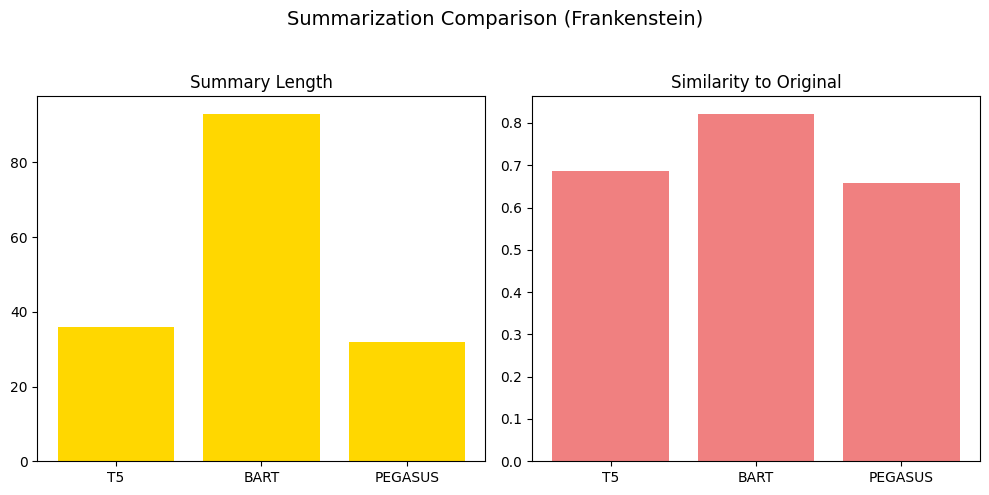

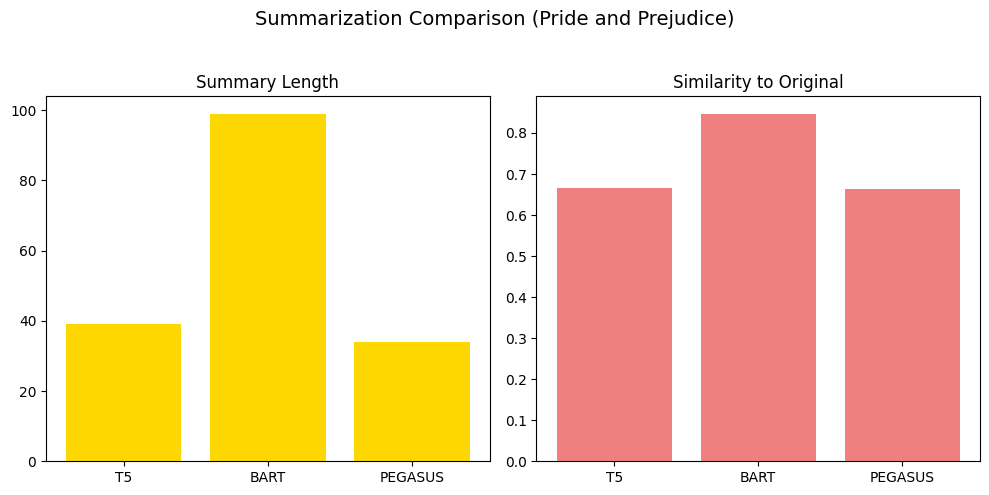

In [ ]:
import matplotlib.pyplot as plt

def plot_enhanced_summarization_comparison(metrics, title="Summarization Comparison"):
    """Plot enhanced metrics for summarization models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Length
    ax1.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['length'], metrics['bart']['length'], metrics['pegasus']['length']],
            color='gold')
    ax1.set_title('Summary Length')

    # Similarity to Original
    ax2.bar(['T5', 'BART', 'PEGASUS'],
            [metrics['t5']['sim_to_original'],
             metrics['bart']['sim_to_original'],
             metrics['pegasus']['sim_to_original']],
            color='lightcoral')
    ax2.set_title('Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_enhanced_summarization_comparison(comparison_first, title="Summarization Comparison (Frankenstein)")
plot_enhanced_summarization_comparison(comparison_second, title="Summarization Comparison (Pride and Prejudice)")

##Enhanced Paraphrasing Metrics Plot
####Visualize PEGASUS vs T5-Paraphrase vs BART-Paraphrase metrics.

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/transformers/models/t5/tokenization_t5.py:287: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


----------- Enhanced Paraphrasing Comparison -----------
PEGASUS Paraphrases (Avg Length: 9.0, Avg Sim to Original: 0.917):
  1. Artificial intelligence is transforming healthcare delivery, diagnosis, and research.
  2. Artificial intelligence is transforming healthcare delivery, diagnosis and research.
  3. Artificial intelligence is changing healthcare delivery, diagnosis, and research.

T5-Paraphrase Paraphrases (Avg Length: 12.3, Avg Sim to Original: 0.981):
  1. Recent advances in artificial intelligence (AI) are transforming healthcare delivery, diagnosis and research
  2. Recent advances in artificial intelligence (AI) transform healthcare delivery, diagnosis and research
  3. Recent advances in artificial intelligence (AI) transforming healthcare delivery, diagnosis and research

BART-Paraphrase Paraphrases (Avg Length: 12.7, Avg Sim to Original: 0.984):
  1. Recent advances in artificial intelligence (AI) are transforming healthcare delivery, diagnosis and research.
  2. Recen

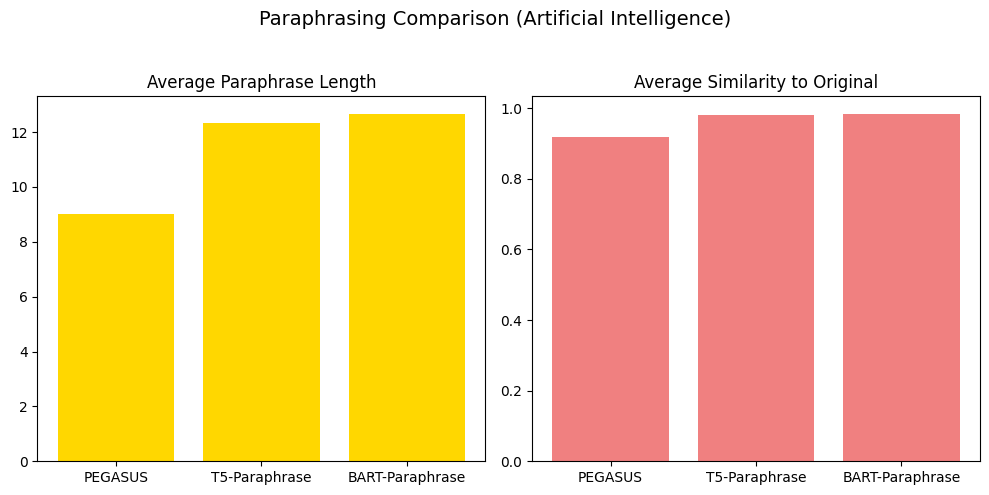

In [ ]:
import matplotlib.pyplot as plt
import re
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Define input1
input1 = '''
Recent advances in artificial intelligence (AI) are transforming healthcare
delivery, diagnosis, and research. Machine learning models now assist
physicians by analyzing medical images such as X-rays and MRIs, detecting
anomalies often at or above human-level accuracy. Natural language processing
helps extract useful information from electronic health records (EHRs),
making long patient histories searchable and enabling clinical decision
support.
AI-driven drug discovery pipelines speed up candidate screening by predicting
molecular properties and potential toxicity, lowering time-to-discovery and
cost. Personalized medicine benefits from predictive models that combine
genomic, lifestyle, and clinical data to recommend tailored therapies.
Telemedicine adoption — accelerated by the COVID-19 pandemic — relies on AI
for remote monitoring and triage.
However, challenges remain. Data privacy and patient consent are critical
when using sensitive health records. Models trained on limited or biased
datasets may perform poorly for underrepresented populations, exacerbating
health disparities. Explainability is another concern: clinicians need
interpretable model outputs to trust recommendations. Regulatory frameworks
and robust validation are required before clinical deployment.
As research continues, interdisciplinary collaboration among clinicians, data
scientists, regulators, and ethicists will be essential to ensure AI tools
are safe, effective, and equitable. Investment in infrastructure, proper data
governance, and transparent evaluation will help integrate AI responsibly
within healthcare systems.
'''

# Load Paraphrasing Models
pegasus_para_tokenizer = PegasusTokenizer.from_pretrained('tuner007/pegasus_paraphrase')
pegasus_para_model = PegasusForConditionalGeneration.from_pretrained('tuner007/pegasus_paraphrase')
paraphrase_t5_tokenizer = T5Tokenizer.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_t5_model = T5ForConditionalGeneration.from_pretrained('Vamsi/T5_Paraphrase_Paws')
paraphrase_bart_tokenizer = BartTokenizer.from_pretrained('eugenesiow/bart-paraphrase')
paraphrase_bart_model = BartForConditionalGeneration.from_pretrained('eugenesiow/bart-paraphrase')

# Load Similarity Model
similarity_model = SentenceTransformer('all-MiniLM-L6-v2')


def generate_pegasus_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with PEGASUS."""
    inputs = pegasus_para_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = pegasus_para_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return pegasus_para_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

def generate_t5_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with T5-Paraphrase."""
    input_text = f"paraphrase: {text} </s>"
    inputs = paraphrase_t5_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    paraphrase_ids = paraphrase_t5_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_t5_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

def generate_bart_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with BART-Paraphrase."""
    inputs = paraphrase_bart_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = paraphrase_bart_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_bart_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

def compute_similarity(text1, text2):
    """Compute cosine similarity between texts."""
    embeddings = similarity_model.encode([text1, text2])
    return cosine_similarity([embeddings[0]], [embeddings[1]])[0][0]


def compare_paraphrasers_enhanced(text, num_return=3, beams=10):
    """Enhanced comparison of PEGASUS, T5-Paraphrase, and BART-Paraphrase."""
    peg_paras = generate_pegasus_paraphrase(text, num_return, beams)
    t5_paras = generate_t5_paraphrase(text, num_return, beams)
    bart_paras = generate_bart_paraphrase(text, num_return, beams)

    metrics = {
        'pegasus': {
            'paraphrases': peg_paras,
            'avg_length': sum(len(p.split()) for p in peg_paras) / len(peg_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in peg_paras) / len(peg_paras)
        },
        't5_paraphrase': {
            'paraphrases': t5_paras,
            'avg_length': sum(len(p.split()) for p in t5_paras) / len(t5_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in t5_paras) / len(t5_paras)
        },
        'bart_paraphrase': {
            'paraphrases': bart_paras,
            'avg_length': sum(len(p.split()) for p in bart_paras) / len(bart_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in bart_paras) / len(bart_paras)
        },
        'avg_sim_peg_t5': sum(compute_similarity(peg_paras[i], t5_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_peg_bart': sum(compute_similarity(peg_paras[i], bart_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_t5_bart': sum(compute_similarity(t5_paras[i], bart_paras[i]) for i in range(num_return)) / num_return
    }

    print("----------- Enhanced Paraphrasing Comparison -----------")
    print(f"PEGASUS Paraphrases (Avg Length: {metrics['pegasus']['avg_length']:.1f}, Avg Sim to Original: {metrics['pegasus']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(peg_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nT5-Paraphrase Paraphrases (Avg Length: {metrics['t5_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['t5_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(t5_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nBART-Paraphrase Paraphrases (Avg Length: {metrics['bart_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['bart_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(bart_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nAverage Similarity PEGASUS vs T5-Paraphrase: {metrics['avg_sim_peg_t5']:.3f}")
    print(f"Average Similarity PEGASUS vs BART-Paraphrase: {metrics['avg_sim_peg_bart']:.3f}")
    print(f"Average Similarity T5-Paraphrase vs BART-Paraphrase: {metrics['avg_sim_t5_bart']:.3f}")

    return metrics

def plot_enhanced_paraphrasing_comparison(metrics, title="Paraphrasing Comparison"):
    """Plot enhanced metrics for paraphrasing models."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Average Length
    ax1.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_length'],
             metrics['t5_paraphrase']['avg_length'],
             metrics['bart_paraphrase']['avg_length']],
            color='gold')
    ax1.set_title('Average Paraphrase Length')

    # Average Similarity to Original
    ax2.bar(['PEGASUS', 'T5-Paraphrase', 'BART-Paraphrase'],
            [metrics['pegasus']['avg_sim_to_original'],
             metrics['t5_paraphrase']['avg_sim_to_original'],
             metrics['bart_paraphrase']['avg_sim_to_original']],
            color='lightcoral')
    ax2.set_title('Average Similarity to Original')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot paraphrasing comparison for first sentence of first text
first_sentence = re.split(r'[.!?]+', input1)[0].strip()
plot_enhanced_paraphrasing_comparison(compare_paraphrasers_enhanced(first_sentence),
                                     title="Paraphrasing Comparison (Artificial Intelligence)")

##Bigram Analysis
####Add bigram analysis using simple string splitting.

In [ ]:
from collections import Counter
import re

def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

def analyze_bigrams(text):
    """Compute top bigrams using string splitting."""
    text = clean_text(text[:2000])  # Clean and limit for performance
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_freq = Counter(bigrams).most_common(5)
    return [(f"{w1} {w2}", count) for (w1, w2), count in bigram_freq]

print("\nBigram Analysis")
# Assuming input1 and input2 are defined in a previous cell
input_texts = {
    'Input 1 (Artificial Intelligence)': input1,
    'Input 2 (Renewable Energy)': input2
}

for key, text_content in input_texts.items():
    print(f"\n{key}:")
    bigrams = analyze_bigrams(text_content)
    print(f"Top Bigrams: {bigrams}")


Bigram Analysis

Input 1 (Artificial Intelligence):
Top Bigrams: [('Recent advances', 1), ('advances in', 1), ('in artificial', 1), ('artificial intelligence', 1), ('intelligence (AI)', 1)]

Input 2 (Renewable Energy):
Top Bigrams: [('costs and', 2), ('Countries worldwide', 1), ('worldwide are', 1), ('are ramping', 1), ('ramping up', 1)]


##Bigram Visualization
####Visualize bigram frequencies.

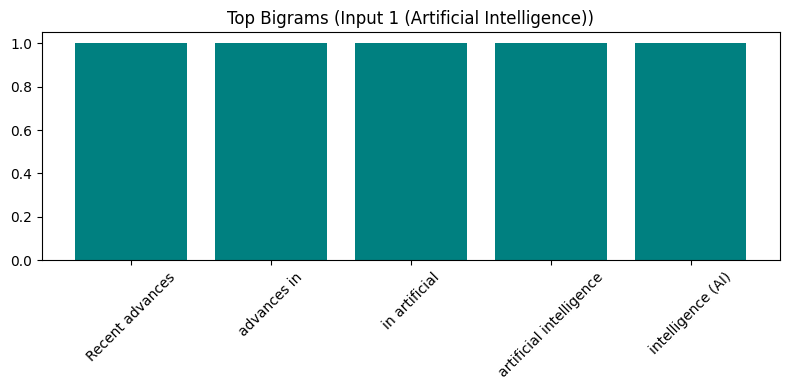

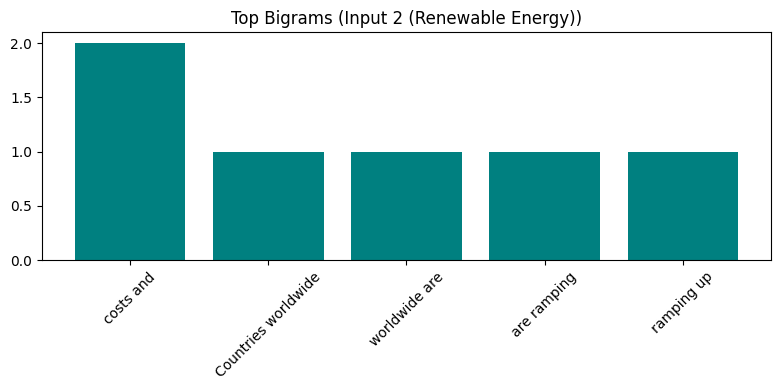

In [ ]:
import matplotlib.pyplot as plt
import re
from collections import Counter

def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

def analyze_bigrams(text):
    """Compute top bigrams using string splitting."""
    text = clean_text(text[:2000])  # Clean and limit for performance
    words = text.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words)-1)]
    bigram_freq = Counter(bigrams).most_common(5)
    return [(f"{w1} {w2}", count) for (w1, w2), count in bigram_freq]

def plot_bigrams(bigrams, title="Top Bigrams"):
    """Plot top bigrams."""
    if bigrams:
        labels, counts = zip(*bigrams)
        plt.figure(figsize=(8, 4))
        plt.bar(labels, counts, color='teal')
        plt.title(title, fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Assuming input1 and input2 are defined in a previous cell
input_texts = {
    'Input 1 (Artificial Intelligence)': input1,
    'Input 2 (Renewable Energy)': input2
}


for key, text_content in input_texts.items():
    bigrams = analyze_bigrams(text_content)
    plot_bigrams(bigrams, title=f"Top Bigrams ({key})")